In [1]:
#import the libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

#import the data

df=sm.datasets.macrodata.load_pandas().data


In [2]:

#run the model

mod = sm.tsa.VARMAX(df.loc[:, ('realgdp', 'm1', 'pop')], order=(5,  0), trend='t')
res = mod.fit(maxiter=100, disp=True)
print(res.summary())

C:\Users\zehov\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\zehov\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                              Statespace Model Results                              
Dep. Variable:     ['realgdp', 'm1', 'pop']   No. Observations:                  203
Model:                               VAR(5)   Log Likelihood              -28011.546
                                + intercept   AIC                          56131.092
Date:                      Tue, 06 Jun 2023   BIC                          56310.005
Time:                              17:47:37   HQIC                         56203.473
Sample:                                   0                                         
                                      - 203                                         
Covariance Type:                        opg                                         
Ljung-Box (L1) (Q):     197.30, 186.58, 94.06   Jarque-Bera (JB):   8.91, 20.52, 6269.38
Prob(Q):                     0.00, 0.00, 0.00   Prob(JB):               0.01, 0.00, 0.00
Heteroskedasticity (H):      0.27, 0.30, 0.39   Skew:    

In [26]:
help(res.impulse_responses)

Help on method impulse_responses in module statsmodels.tsa.statespace.mlemodel:

impulse_responses(steps=1, impulse=0, orthogonalized=False, cumulative=False, **kwargs) method of statsmodels.tsa.statespace.varmax.VARMAXResultsWrapper instance
    impulse_responses(self, steps=1, impulse=0, orthogonalized=False, cumulative=False, **kwargs)
    
    Impulse response function
    
    Parameters
    ----------
    steps : int, optional
        The number of steps for which impulse responses are calculated.
        Default is 1. Note that for time-invariant models, the initial
        impulse is not counted as a step, so if `steps=1`, the output will
        have 2 entries.
    impulse : int, str or array_like
        If an integer, the state innovation to pulse; must be between 0
        and `k_posdef-1`. If a str, it indicates which column of df
        the unit (1) impulse is given.
        Alternatively, a custom impulse vector may be provided; must be
        shaped `k_posdef x 1`.
  

<AxesSubplot: >

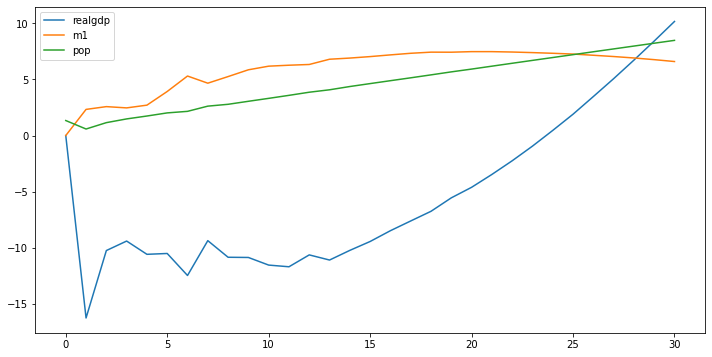

In [9]:
res.impulse_responses(30, 2, orthogonalized=True, cumulative=True).plot(figsize=(12, 6))